# 01 Exploratory data analysis of a Amazon sales dataset

This notebook provides an exploratory data analysis (EDA) of an Amazon e-commerce sales dataset.
The goal of this analysis is to understand the structure of the data, identify data quality issues,
and extract initial insights that can be useful for further modeling or business decision-making.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msn

In [3]:
df = pd.read_csv("../Data/Raw/Amazon Sale Report.csv", low_memory=False) #collumn 23 has mixed types

In [4]:
df.head()

index             Order ID      Date                        Status  \
0      0  405-8078784-5731545  04-30-22                     Cancelled   
1      1  171-9198151-1101146  04-30-22  Shipped - Delivered to Buyer   
2      2  404-0687676-7273146  04-30-22                       Shipped   
3      3  403-9615377-8133951  04-30-22                     Cancelled   
4      4  407-1069790-7240320  04-30-22                       Shipped   

  Fulfilment Sales Channel  ship-service-level    Style              SKU  \
0   Merchant      Amazon.in           Standard   SET389   SET389-KR-NP-S   
1   Merchant      Amazon.in           Standard  JNE3781  JNE3781-KR-XXXL   
2     Amazon      Amazon.in          Expedited  JNE3371    JNE3371-KR-XL   
3   Merchant      Amazon.in           Standard    J0341       J0341-DR-L   
4     Amazon      Amazon.in          Expedited  JNE3671  JNE3671-TU-XXXL   

        Category  ... currency  Amount    ship-city   ship-state  \
0            Set  ...      INR  647.62       MUMBAI  MAHARASHTRA   
1          kurta  ...      INR  406.00    BENGALURU    KARNATAKA   
2          kurta  ...      INR  329.00  NAVI MUMBAI  MAHARASHTRA   
3  Western Dress  ...      INR  753.33   PUDUCHERRY   PUDUCHERRY   
4            Top  ...      INR  574.00      CHENNAI   TAMIL NADU   

  ship-postal-code  ship-country  \
0         400081.0            IN   
1         560085.0            IN   
2         410210.0            IN   
3         605008.0            IN   
4         600073.0            IN   

                                       promotion-ids    B2B  fulfilled-by  \
0                                                NaN  False     Easy Ship   
1  Amazon PLCC Free-Financing Universal Merchant ...  False     Easy Ship   
2       IN Core Free Shipping 2015/04/08 23-48-5-108   True           NaN   
3                                                NaN  False     Easy Ship   
4                                                NaN  False           NaN   

  Unnamed: 22  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4         NaN  

[5 rows x 24 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128975 non-null  int64  
 1   Order ID            128975 non-null  object 
 2   Date                128975 non-null  object 
 3   Status              128975 non-null  object 
 4   Fulfilment          128975 non-null  object 
 5   Sales Channel       128975 non-null  object 
 6   ship-service-level  128975 non-null  object 
 7   Style               128975 non-null  object 
 8   SKU                 128975 non-null  object 
 9   Category            128975 non-null  object 
 10  Size                128975 non-null  object 
 11  ASIN                128975 non-null  object 
 12  Courier Status      122103 non-null  object 
 13  Qty                 128975 non-null  int64  
 14  currency            121180 non-null  object 
 15  Amount              121180 non-nul

In [6]:
df_ov = df.drop(columns=['index', 'Order ID'])

In [7]:
df_ov

Date                        Status Fulfilment Sales Channel   \
0       04-30-22                     Cancelled   Merchant      Amazon.in   
1       04-30-22  Shipped - Delivered to Buyer   Merchant      Amazon.in   
2       04-30-22                       Shipped     Amazon      Amazon.in   
3       04-30-22                     Cancelled   Merchant      Amazon.in   
4       04-30-22                       Shipped     Amazon      Amazon.in   
...          ...                           ...        ...            ...   
128970  05-31-22                       Shipped     Amazon      Amazon.in   
128971  05-31-22                       Shipped     Amazon      Amazon.in   
128972  05-31-22                       Shipped     Amazon      Amazon.in   
128973  05-31-22                       Shipped     Amazon      Amazon.in   
128974  05-31-22                       Shipped     Amazon      Amazon.in   

       ship-service-level    Style              SKU       Category Size  \
0                Standard   SET389   SET389-KR-NP-S            Set    S   
1                Standard  JNE3781  JNE3781-KR-XXXL          kurta  3XL   
2               Expedited  JNE3371    JNE3371-KR-XL          kurta   XL   
3                Standard    J0341       J0341-DR-L  Western Dress    L   
4               Expedited  JNE3671  JNE3671-TU-XXXL            Top  3XL   
...                   ...      ...              ...            ...  ...   
128970          Expedited  JNE3697    JNE3697-KR-XL          kurta   XL   
128971          Expedited   SET401   SET401-KR-NP-M            Set    M   
128972          Expedited    J0157     J0157-DR-XXL  Western Dress  XXL   
128973          Expedited    J0012     J0012-SKD-XS            Set   XS   
128974          Expedited    J0003      J0003-SET-S            Set    S   

              ASIN  ... currency   Amount    ship-city    ship-state  \
0       B09KXVBD7Z  ...      INR   647.62       MUMBAI   MAHARASHTRA   
1       B09K3WFS32  ...      INR   406.00    BENGALURU     KARNATAKA   
2       B07WV4JV4D  ...      INR   329.00  NAVI MUMBAI   MAHARASHTRA   
3       B099NRCT7B  ...      INR   753.33   PUDUCHERRY    PUDUCHERRY   
4       B098714BZP  ...      INR   574.00      CHENNAI    TAMIL NADU   
...            ...  ...      ...      ...          ...           ...   
128970  B098112V2V  ...      INR   517.00    HYDERABAD     TELANGANA   
128971  B09VC6KHX8  ...      INR   999.00     GURUGRAM       HARYANA   
128972  B0982YZ51B  ...      INR   690.00    HYDERABAD     TELANGANA   
128973  B0894Y2NJQ  ...      INR  1199.00        Halol       Gujarat   
128974  B0894X27FC  ...      INR   696.00       Raipur  CHHATTISGARH   

       ship-postal-code ship-country  \
0              400081.0           IN   
1              560085.0           IN   
2              410210.0           IN   
3              605008.0           IN   
4              600073.0           IN   
...                 ...          ...   
128970         500013.0           IN   
128971         122004.0           IN   
128972         500049.0           IN   
128973         389350.0           IN   
128974         492014.0           IN   

                                            promotion-ids    B2B fulfilled-by  \
0                                                     NaN  False    Easy Ship   
1       Amazon PLCC Free-Financing Universal Merchant ...  False    Easy Ship   
2            IN Core Free Shipping 2015/04/08 23-48-5-108   True          NaN   
3                                                     NaN  False    Easy Ship   
4                                                     NaN  False          NaN   
...                                                   ...    ...          ...   
128970                                                NaN  False          NaN   
128971       IN Core Free Shipping 2015/04/08 23-48-5-108  False          NaN   
128972                                                NaN  False          NaN   
128973       IN Core Free Shipping 2015/04

The dataset contains a mix of numerical and categorical features.
Some columns may require type conversion or cleaning before further analysis.

In [8]:
df['Unnamed: 22'].unique()

array([nan, False], dtype=object)

In [9]:
df['Unnamed: 22'].isna().sum()

np.int64(49050)

## Missing values

<Axes: >

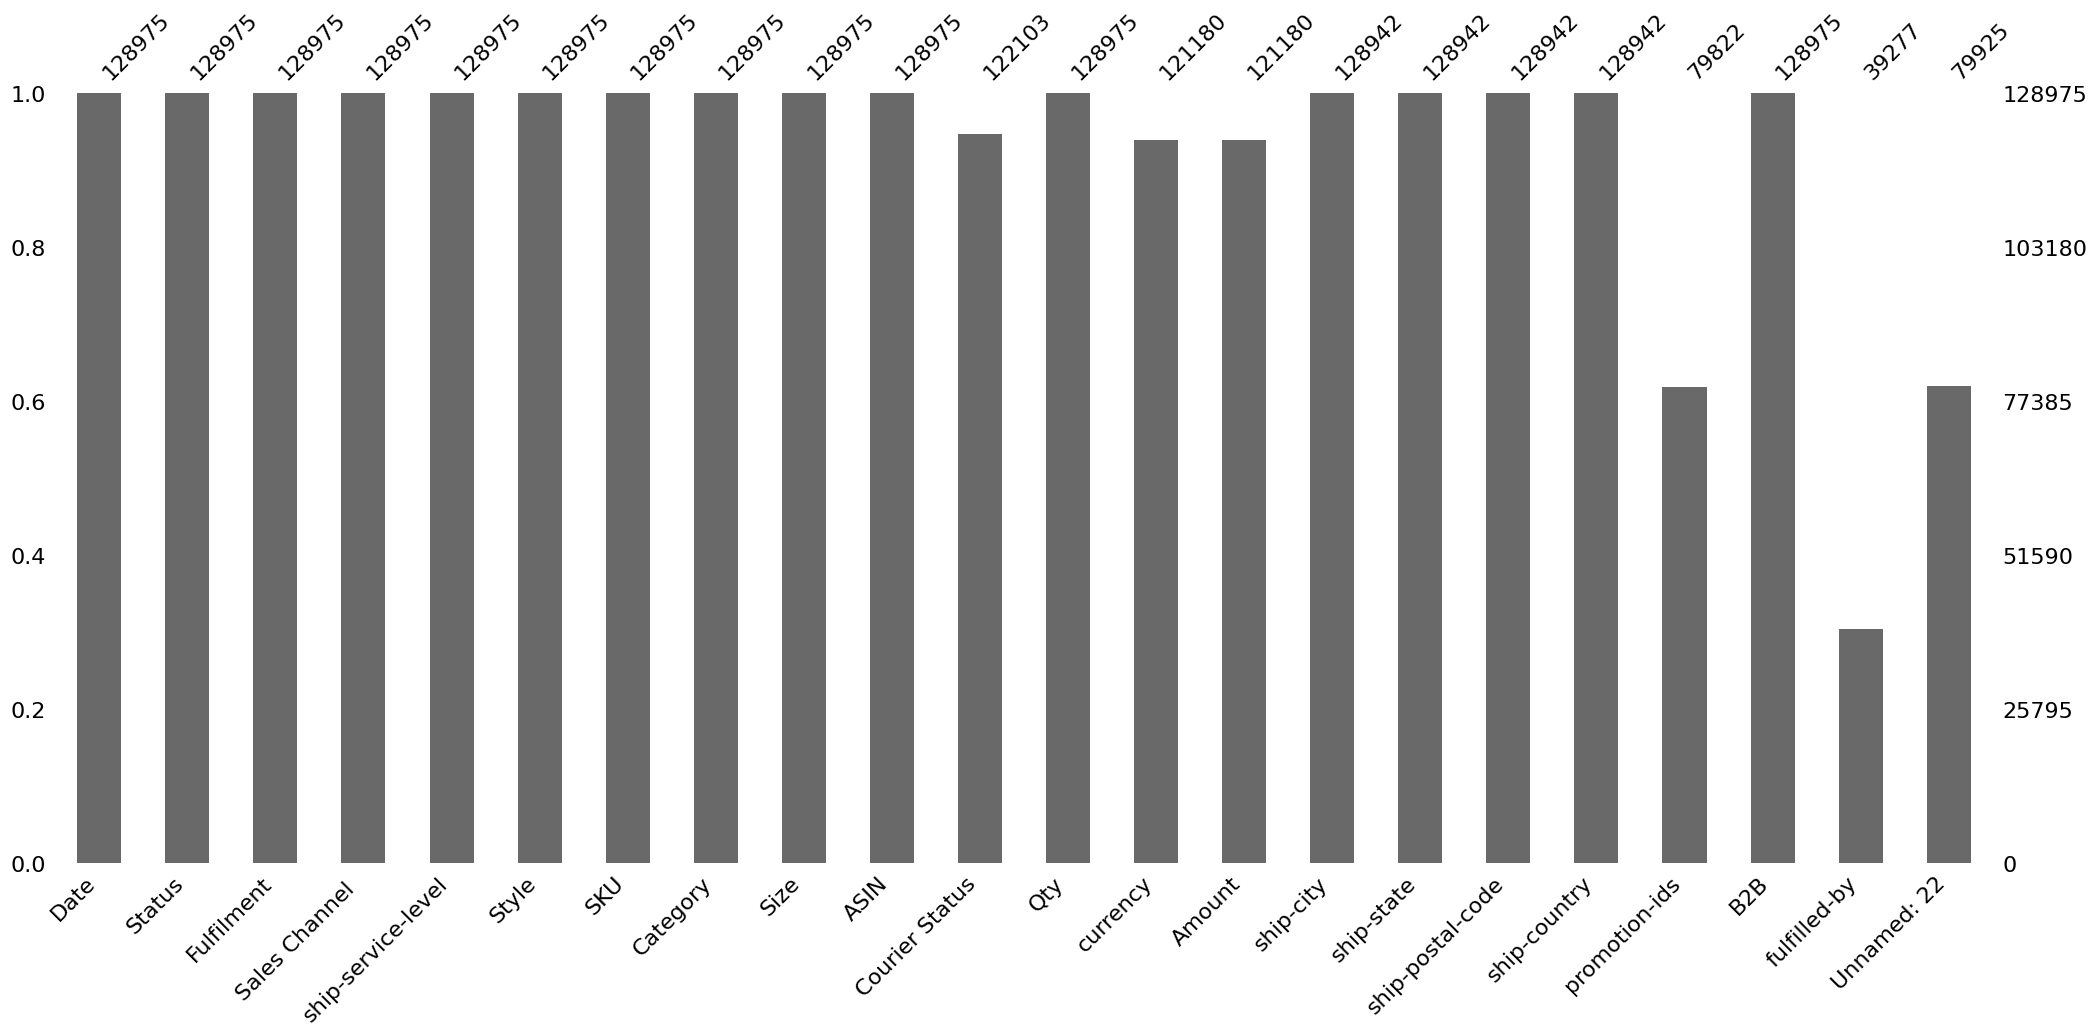

In [10]:
msn.bar(df_ov)

<Axes: >

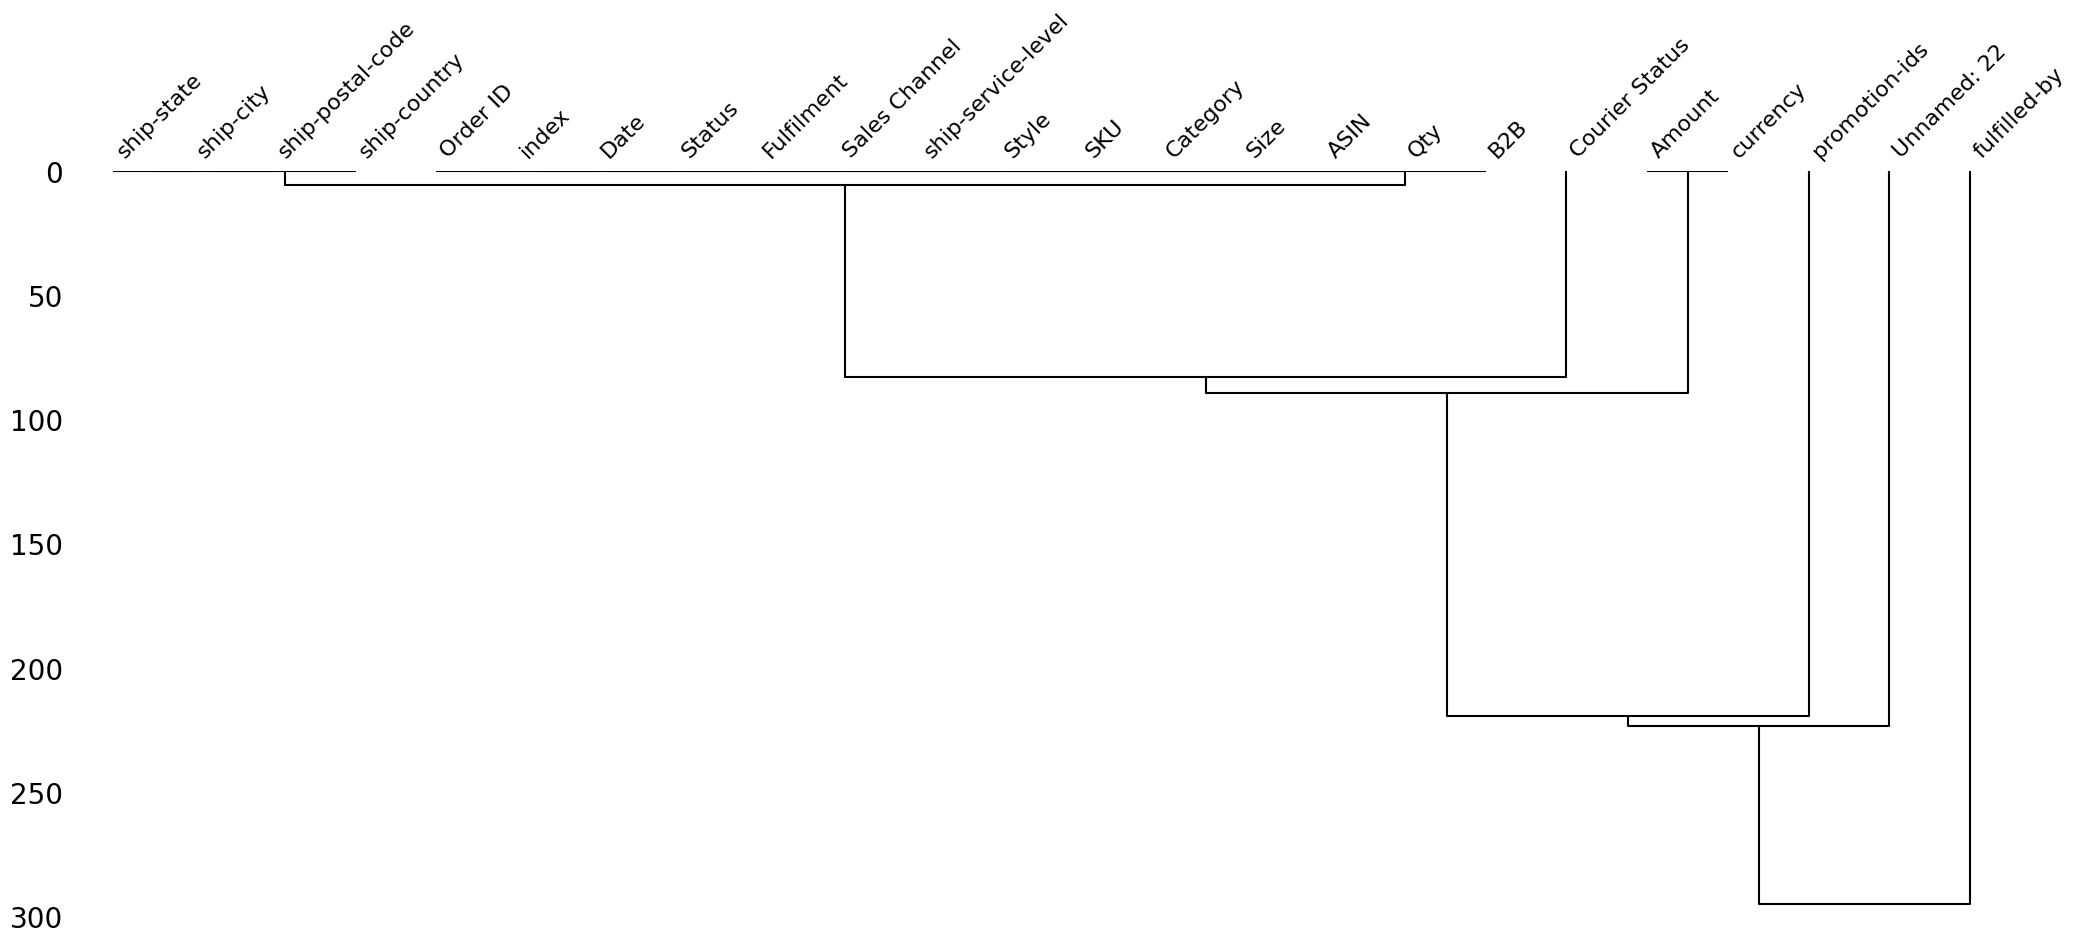

In [11]:
msn.dendrogram(df)

<Axes: >

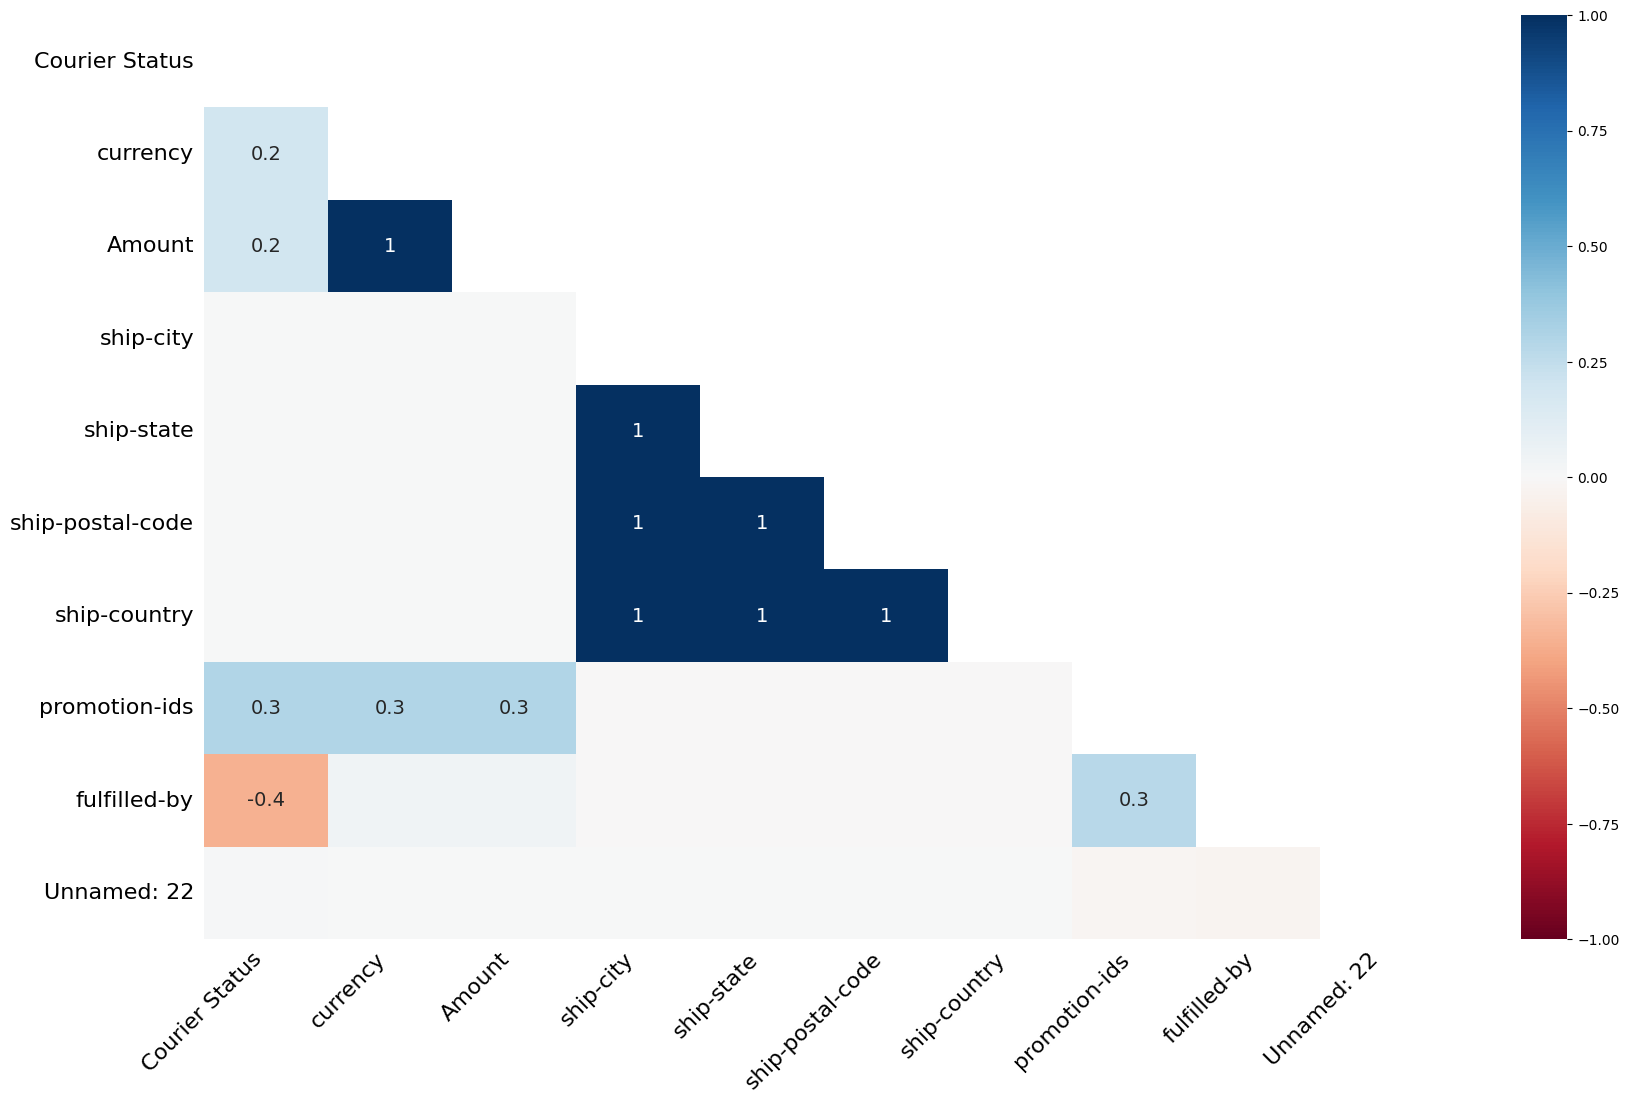

In [12]:
msn.heatmap(df)

Shipping location fields are completely correlated which is logical. These variables contain redundant information. They likely always appear together and don't add independent value. Keeping them all may cause multicollinearity. I choose to keep the ship-state feature.

The purchase amount is not strongly dependent on currency in this dataset. Currency choice doesn’t strongly influence order value. Amount is more driven by other factors.

Courier status is weakly related to order amount and promotions. There is a moderate negative relationship with fulfilled-by .Orders fulfilled in a certain way may have different courier outcomes. Fulfillment method seems more influential than price or currency. 

<Axes: >

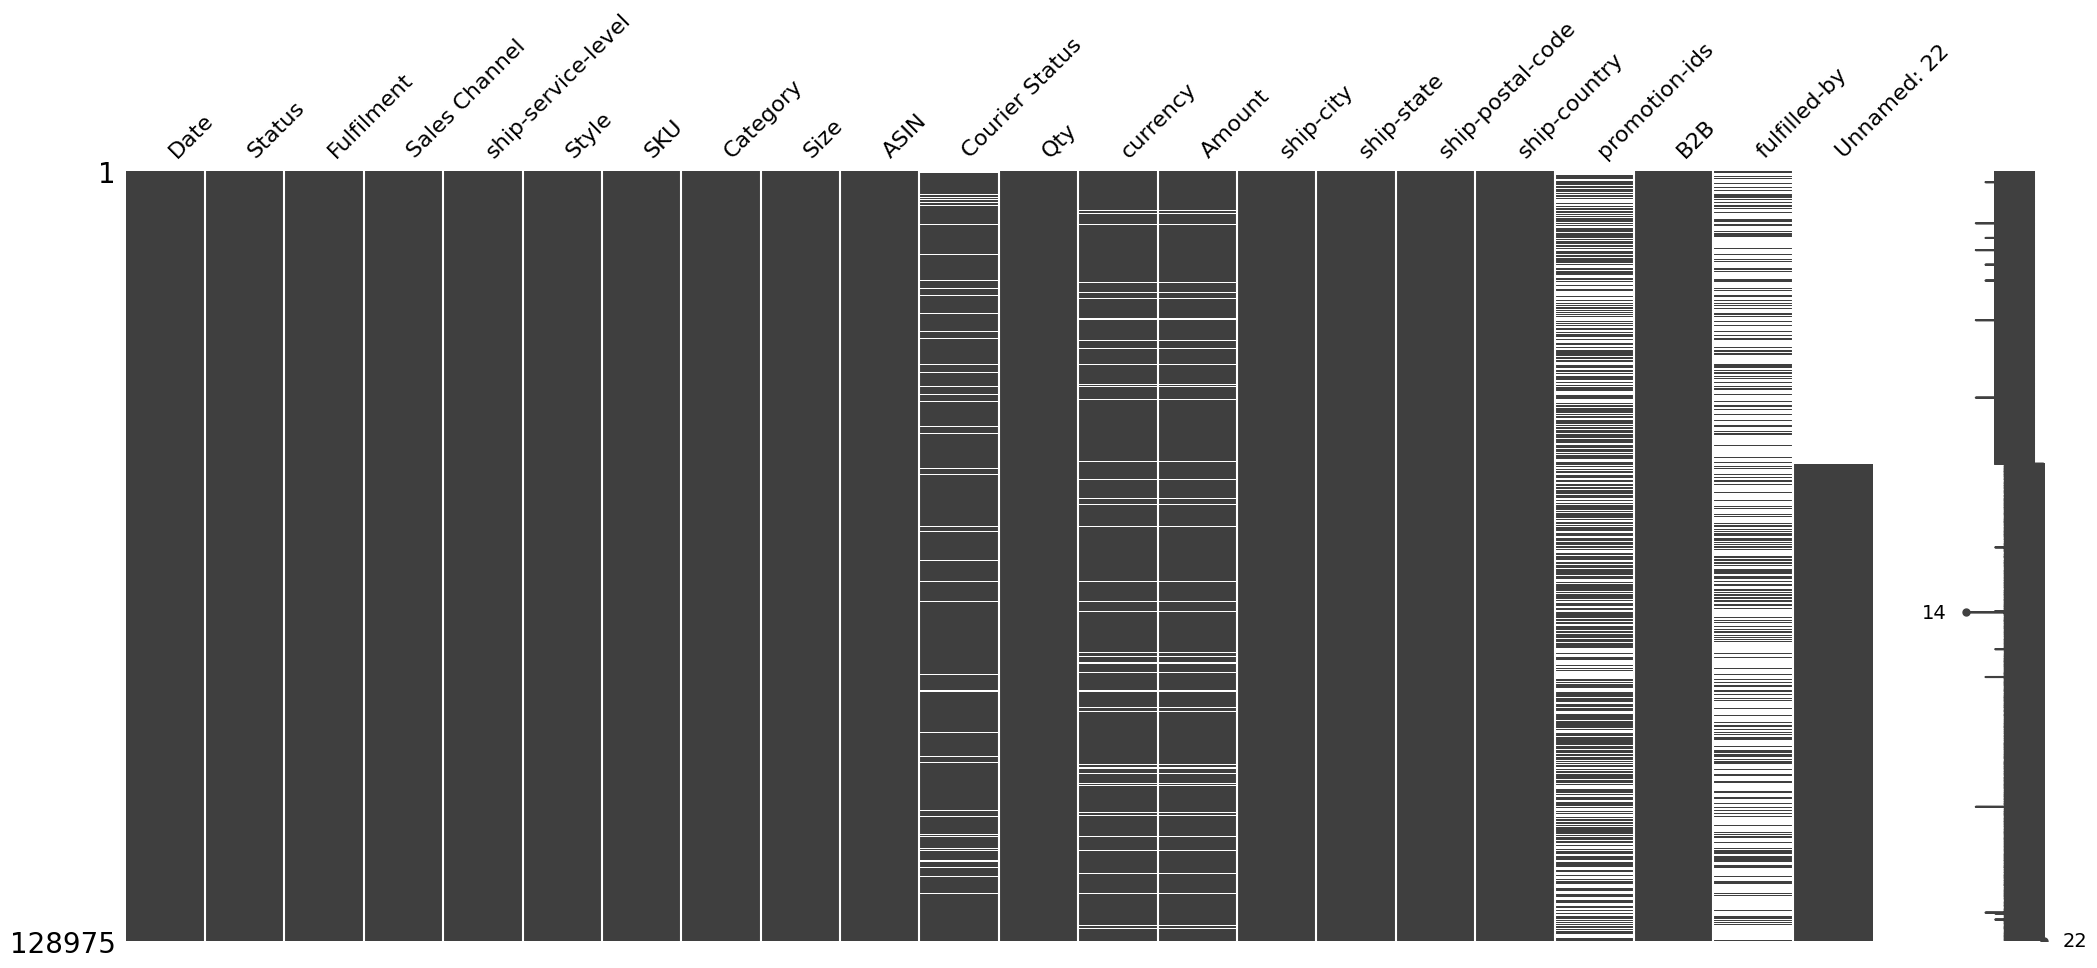

In [13]:
msn.matrix(df_ov)

Most columns contain little to no missing data.
However, columns with a higher percentage of missing values may require
imputation or removal, depending on their importance for the analysis.

In [14]:
df.select_dtypes(include='object').nunique().sort_values(ascending=False)

Order ID              120378
ship-city               8955
SKU                     7195
ASIN                    7190
promotion-ids           5787
Style                   1377
Date                      91
ship-state                69
Status                    13
Size                      11
Category                   9
Courier Status             3
Sales Channel              2
ship-service-level         2
Fulfilment                 2
currency                   1
ship-country               1
fulfilled-by               1
Unnamed: 22                1
dtype: int64

In [15]:
missing_percentage = df_ov.isnull().sum() * 100
missing_percentage = missing_percentage.sort_values(ascending=False)

missing_percentage

fulfilled-by          8969800
promotion-ids         4915300
Unnamed: 22           4905000
currency               779500
Amount                 779500
Courier Status         687200
ship-state               3300
ship-postal-code         3300
ship-city                3300
ship-country             3300
Status                      0
Date                        0
Sales Channel               0
Fulfilment                  0
Style                       0
ship-service-level          0
Qty                         0
ASIN                        0
SKU                         0
Category                    0
Size                        0
B2B                         0
dtype: int64

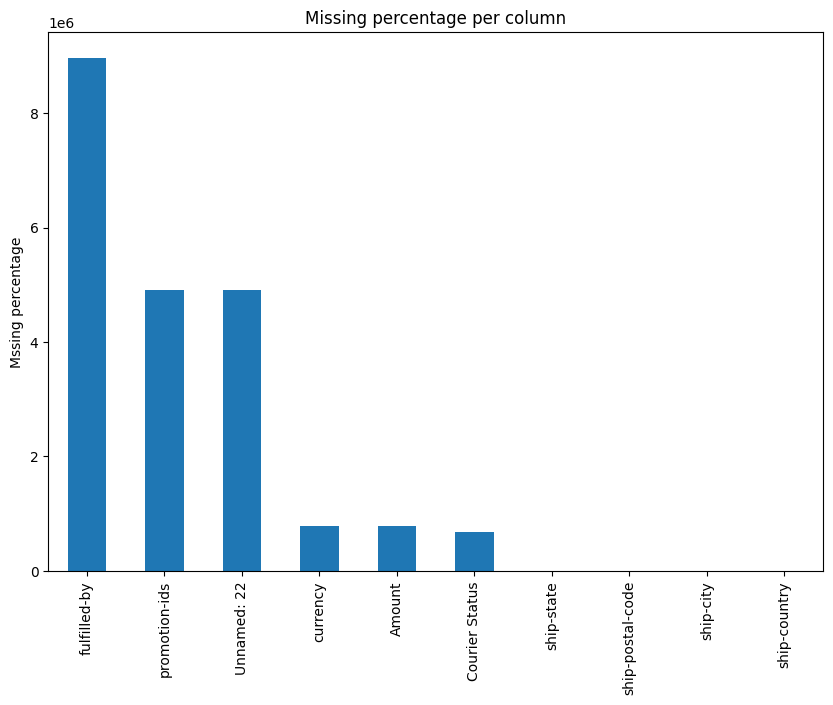

In [16]:
plt.figure(figsize=(10,7))
missing_percentage[missing_percentage > 0].plot(kind='bar')
plt.title("Missing percentage per column")
plt.ylabel("Mssing percentage")
plt.show()

In [17]:
df['fulfilled-by'].unique()

array(['Easy Ship', nan], dtype=object)

In [18]:
fullfilled_by_missing_percentage = df['fulfilled-by'].isna().sum() / len(df) * 100

fullfilled_by_missing_percentage

np.float64(69.54681139755766)

In [19]:
percentage_of_missing_values_per_col = df_ov.isnull().sum() / len(df) * 100

In [20]:
percentage_of_missing_values_per_col = (
    percentage_of_missing_values_per_col.reset_index().rename(
        columns={"index" : "column_name", 0 : "percentage_missing"}
    )
)

In [21]:
percentage_of_missing_values_per_col

column_name  percentage_missing
0                 Date            0.000000
1               Status            0.000000
2           Fulfilment            0.000000
3       Sales Channel             0.000000
4   ship-service-level            0.000000
5                Style            0.000000
6                  SKU            0.000000
7             Category            0.000000
8                 Size            0.000000
9                 ASIN            0.000000
10      Courier Status            5.328164
11                 Qty            0.000000
12            currency            6.043807
13              Amount            6.043807
14           ship-city            0.025586
15          ship-state            0.025586
16    ship-postal-code            0.025586
17        ship-country            0.025586
18       promotion-ids           38.110487
19                 B2B            0.000000
20        fulfilled-by           69.546811
21         Unnamed: 22           38.030626

## Visualizations

In [22]:
print(df_ov.columns.tolist())


['Date', 'Status', 'Fulfilment', 'Sales Channel ', 'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN', 'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code', 'ship-country', 'promotion-ids', 'B2B', 'fulfilled-by', 'Unnamed: 22']


In [23]:
def print_unique_values_for_each(df):
    cols = ["Date", "Status", "Fulfilment", "Sales Channel ", "ship-service-level", "Style", "SKU", "Category", "Size", "ASIN",
           "Courier Status", "Qty", "currency", "Amount", "ship-city", "ship-state", "ship-postal-code",
           "ship-country", "promotion-ids", "B2B"]
    for col in cols:
        unique_vals = df[col].unique()
        print(f"Column ****{col}****")
        print(f"Number of unique values: {len(unique_vals)}")
        print(unique_vals)
        print("-" * 60)

In [24]:
print_unique_values_for_each(df)

Column ****Date****
Number of unique values: 91
['04-30-22' '04-29-22' '04-28-22' '04-27-22' '04-26-22' '04-25-22'
 '04-24-22' '04-23-22' '04-22-22' '04-21-22' '04-20-22' '04-19-22'
 '04-18-22' '04-17-22' '04-16-22' '04-15-22' '04-14-22' '04-13-22'
 '04-12-22' '04-11-22' '04-10-22' '04-09-22' '04-08-22' '04-07-22'
 '04-06-22' '04-05-22' '04-04-22' '04-03-22' '04-02-22' '04-01-22'
 '03-31-22' '05-31-22' '05-30-22' '05-29-22' '05-28-22' '05-27-22'
 '05-26-22' '05-25-22' '05-24-22' '05-23-22' '05-22-22' '05-21-22'
 '05-20-22' '05-19-22' '05-18-22' '05-17-22' '05-16-22' '05-15-22'
 '05-14-22' '05-13-22' '05-12-22' '05-11-22' '05-10-22' '05-09-22'
 '05-08-22' '05-07-22' '05-06-22' '05-05-22' '05-04-22' '05-03-22'
 '05-02-22' '05-01-22' '06-29-22' '06-28-22' '06-27-22' '06-26-22'
 '06-25-22' '06-24-22' '06-23-22' '06-22-22' '06-21-22' '06-20-22'
 '06-19-22' '06-18-22' '06-17-22' '06-16-22' '06-15-22' '06-14-22'
 '06-13-22' '06-12-22' '06-11-22' '06-10-22' '06-09-22' '06-08-22'
 '06-07-22' '0

<Axes: >

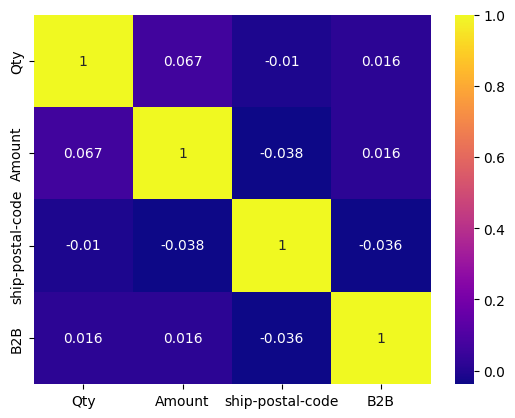

In [25]:
sns.heatmap(df_ov.corr(numeric_only=True), annot=True, cmap="plasma")

There is no strong correlation between the numeric variables.

In [26]:
categorical_cols = df_ov.select_dtypes(include="object").columns
numerical_cols = df_ov.select_dtypes(include=["int64", "float64"]).columns

categorical_cols, numerical_cols

(Index(['Date', 'Status', 'Fulfilment', 'Sales Channel ', 'ship-service-level',
        'Style', 'SKU', 'Category', 'Size', 'ASIN', 'Courier Status',
        'currency', 'ship-city', 'ship-state', 'ship-country', 'promotion-ids',
        'fulfilled-by', 'Unnamed: 22'],
       dtype='object'),
 Index(['Qty', 'Amount', 'ship-postal-code'], dtype='object'))

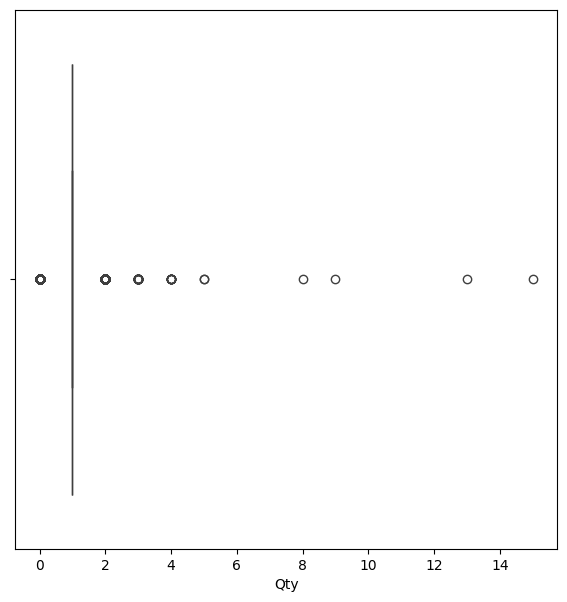

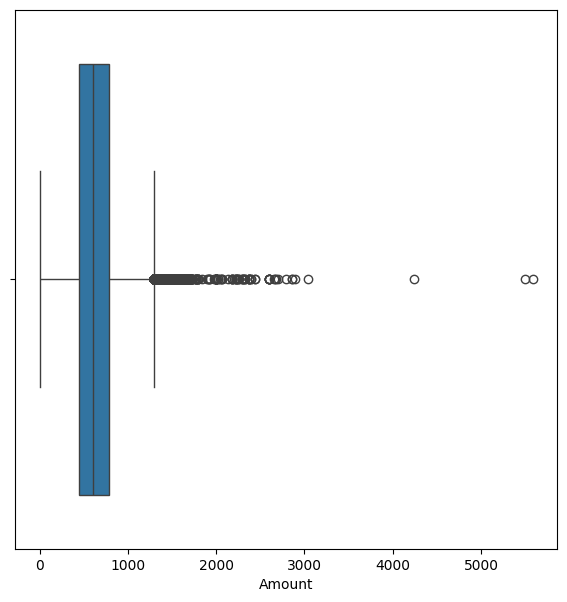

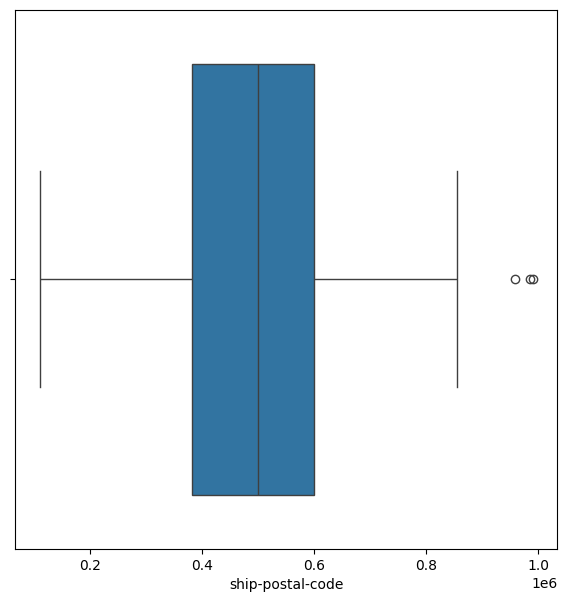

In [27]:
for col in numerical_cols:
    plt.figure(figsize=(7,7))
    sns.boxplot(x=df[col])
    plt.show()

We can see that there are a lot of outliers in the Amount collumn.

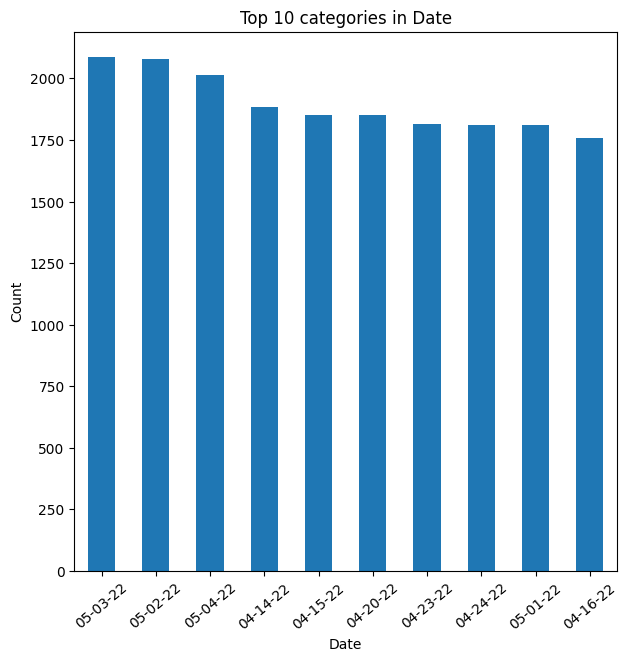

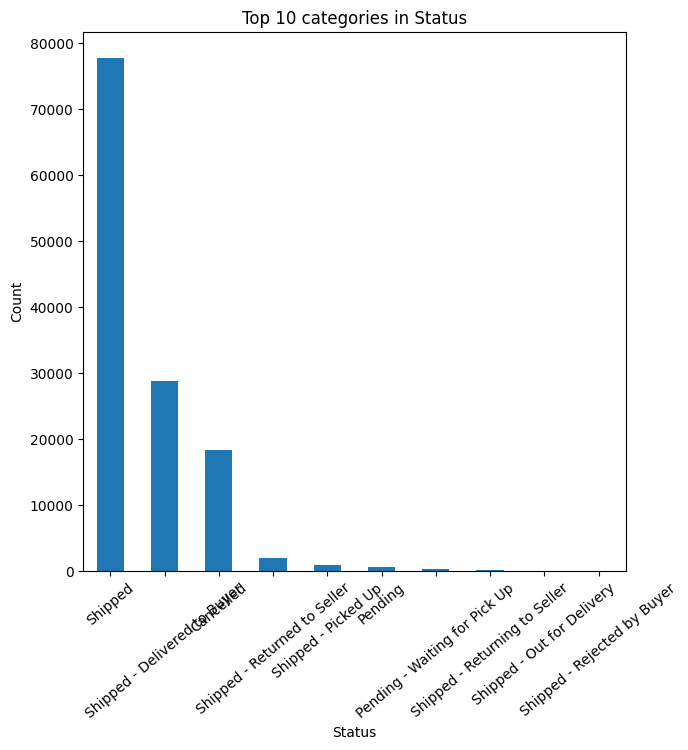

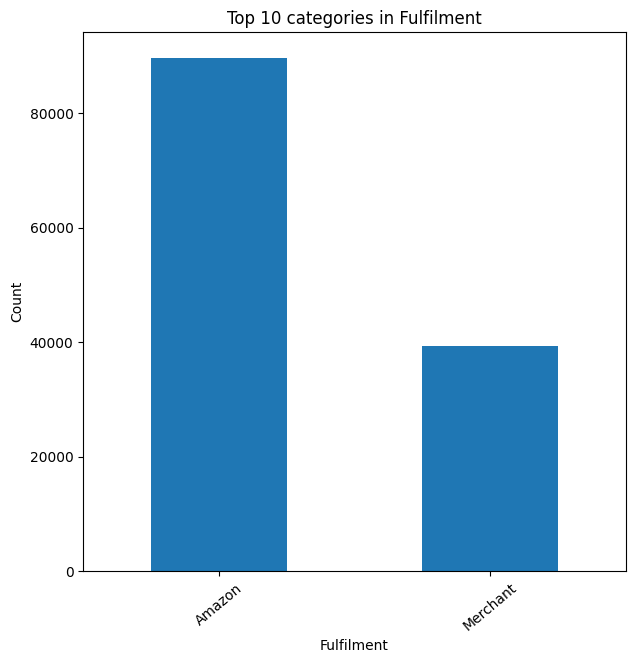

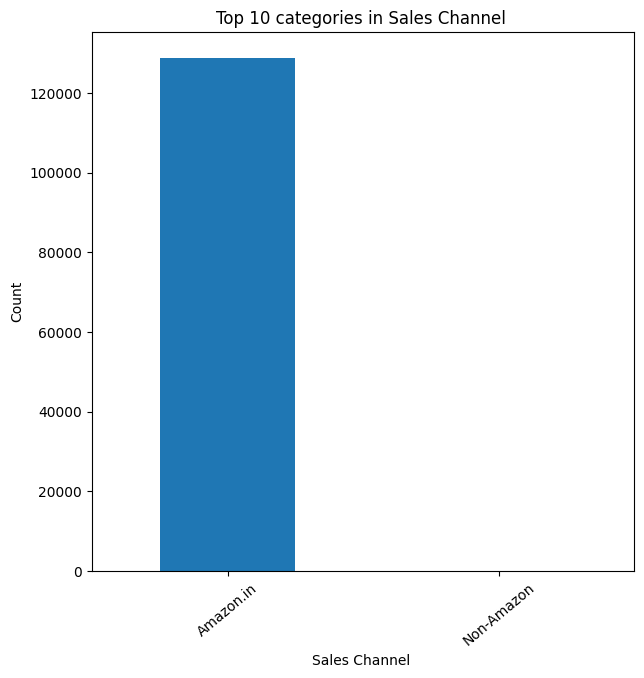

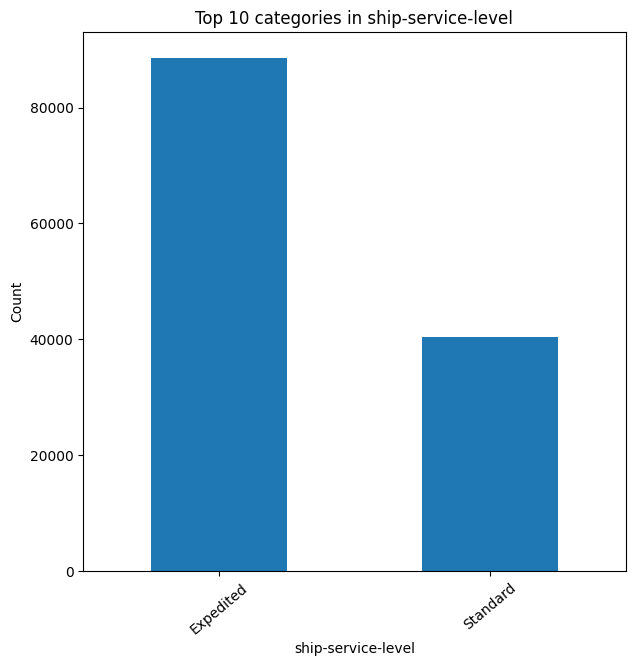

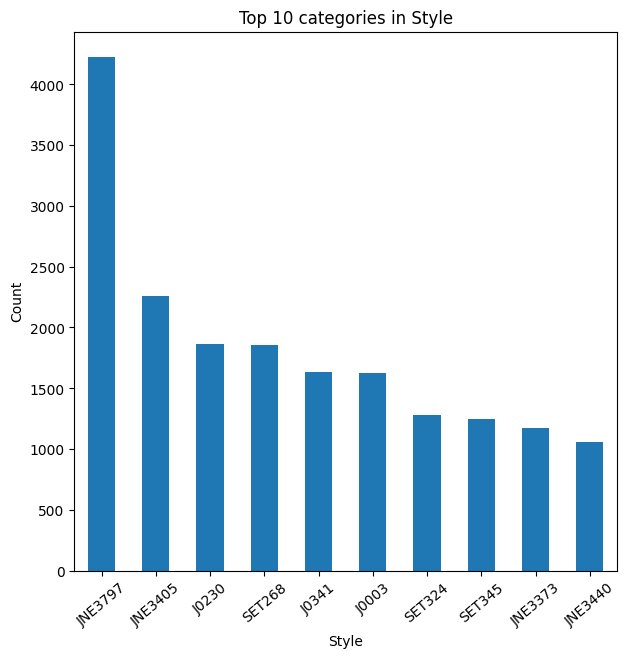

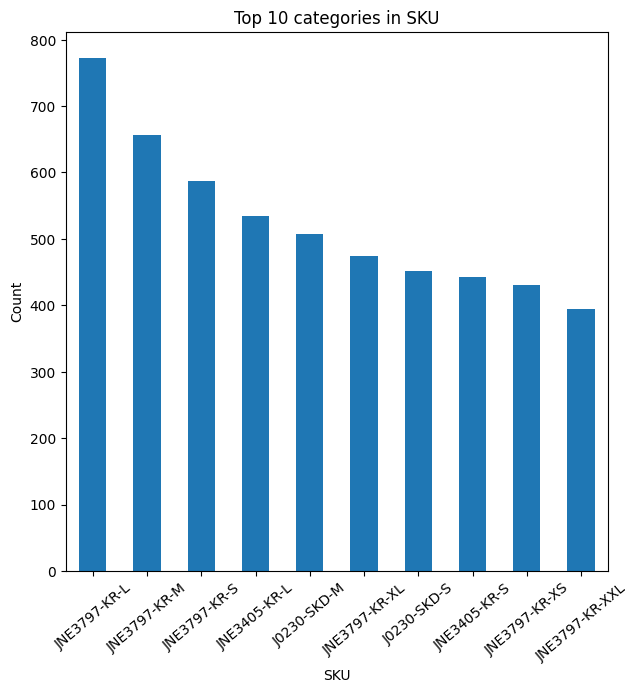

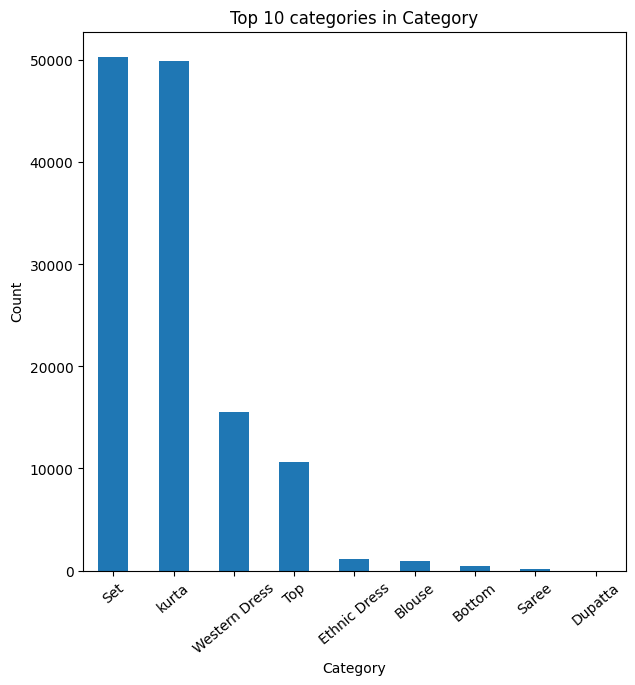

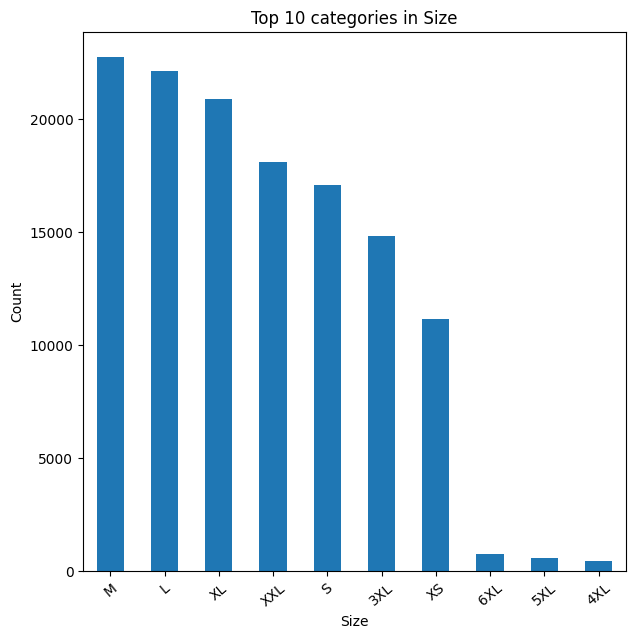

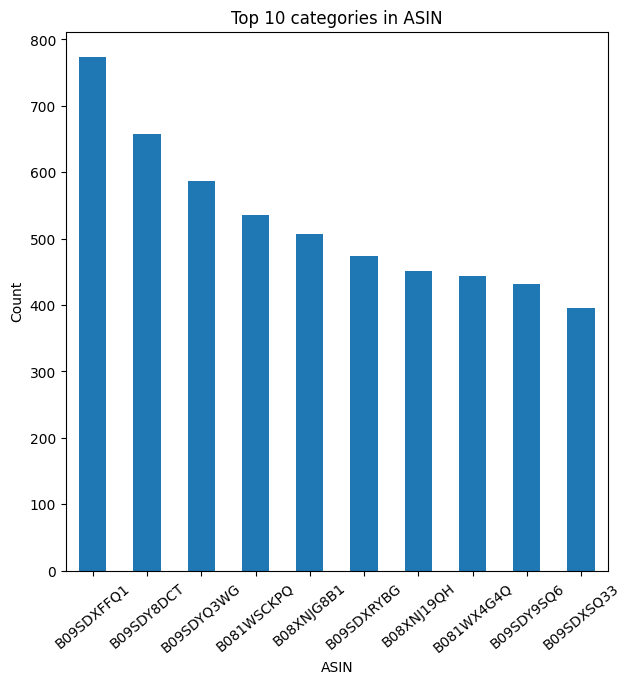

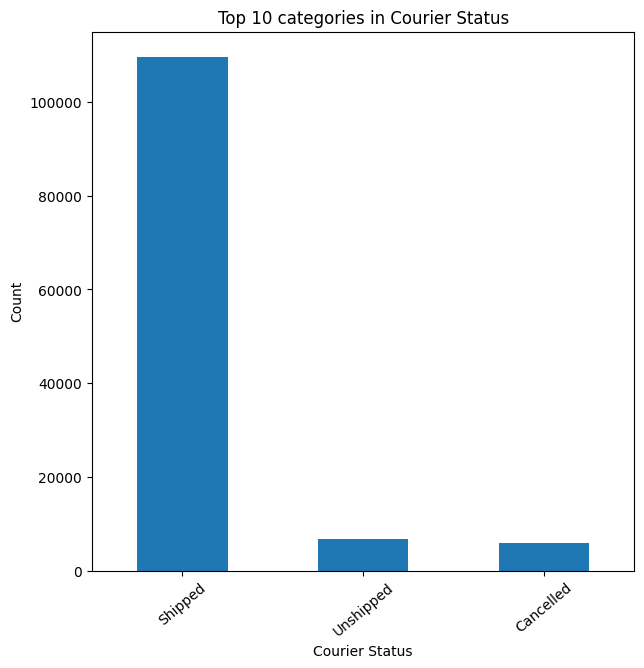

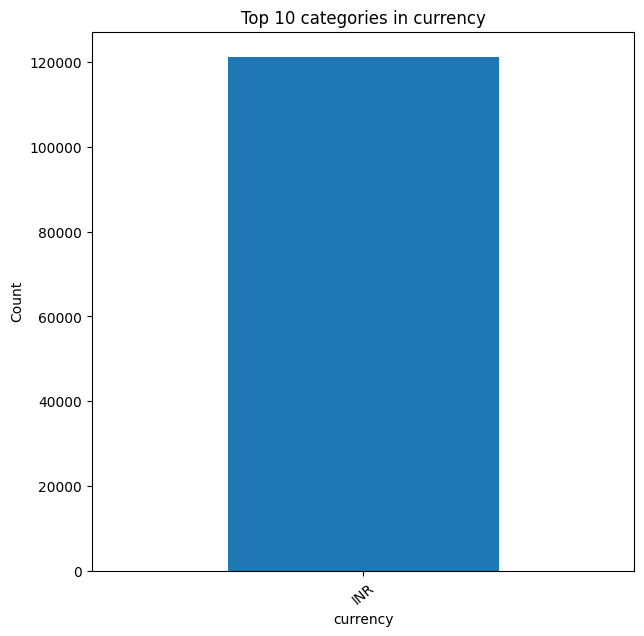

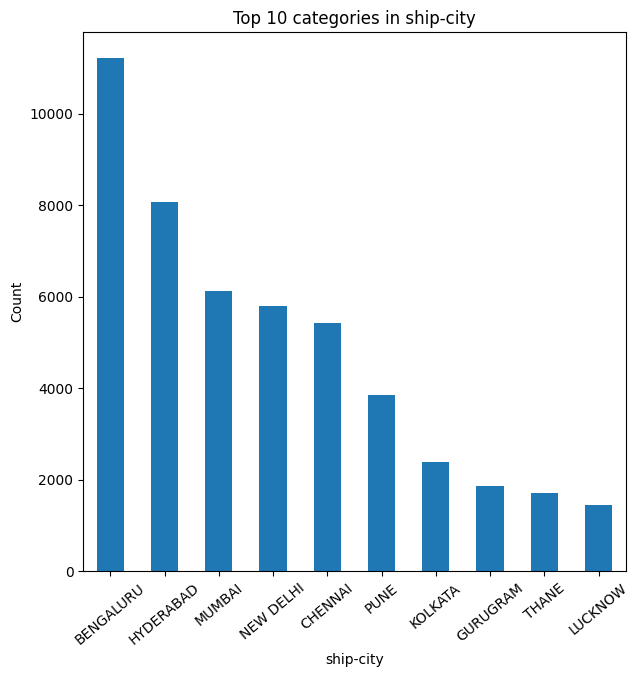

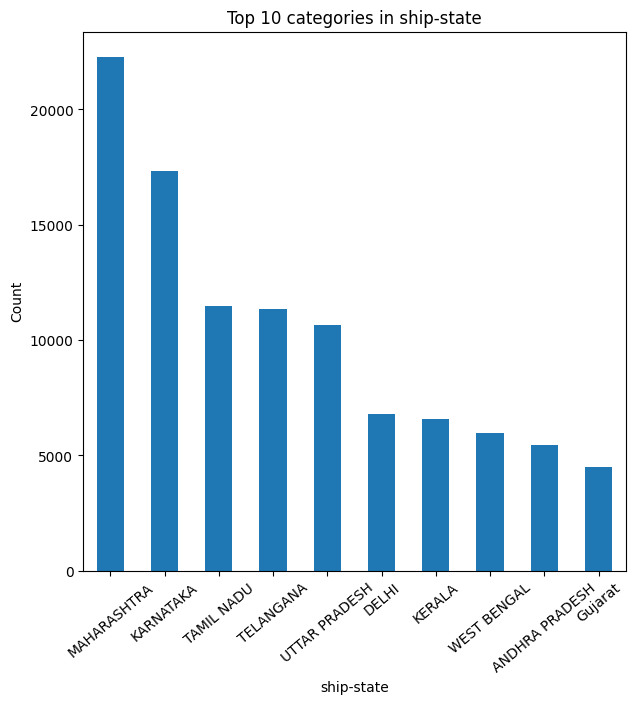

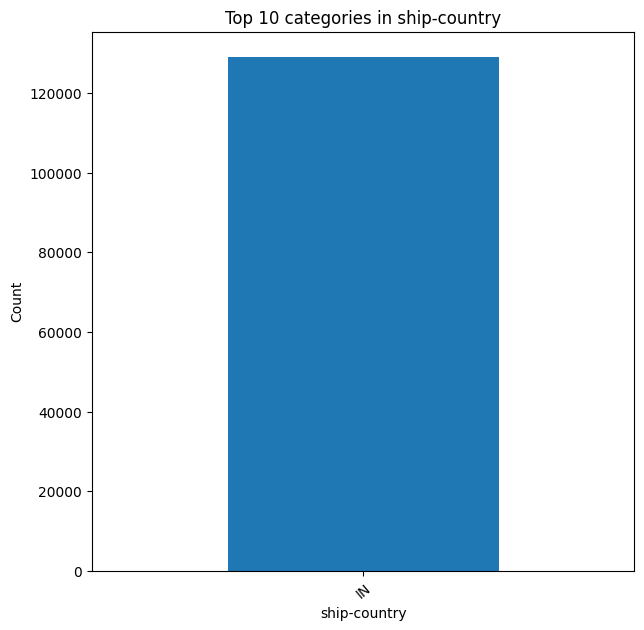

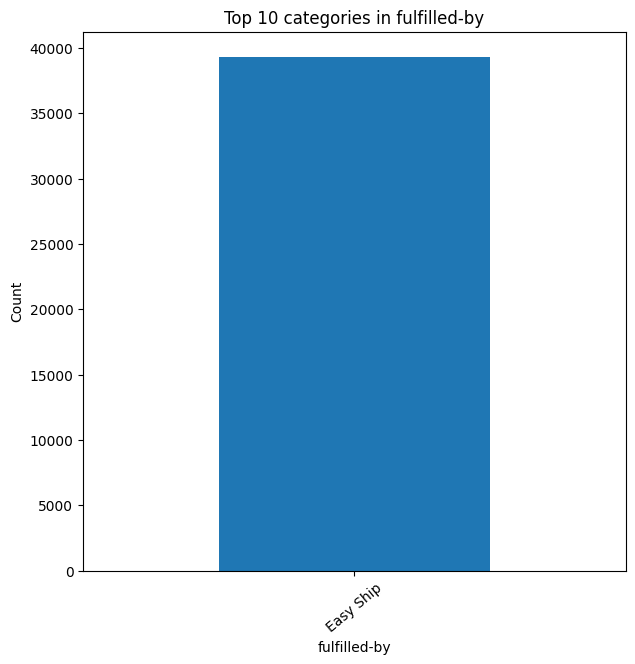

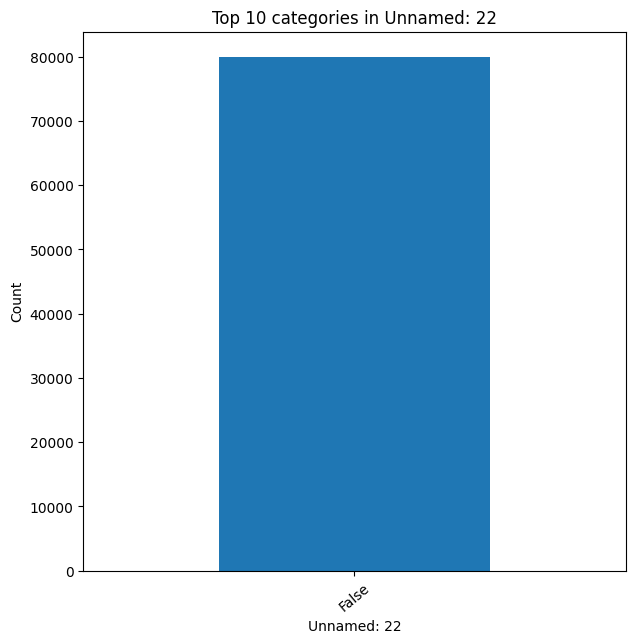

In [28]:
for col in categorical_cols:
    plt.figure(figsize=(7,7))
    df[col].value_counts().head(10).plot(kind='bar')
    plt.title(f"Top 10 categories in {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=40)
    plt.show()

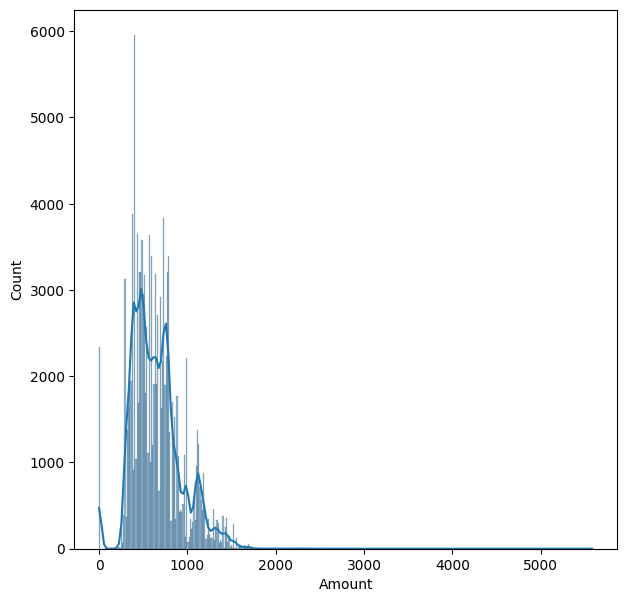

In [29]:
plt.figure(figsize=(7,7))
sns.histplot(data=df, x='Amount', kde=True)
plt.show()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [Text(0, 0, 'Cancelled'),
  Text(1, 0, 'Shipped - Delivered to Buyer'),
  Text(2, 0, 'Shipped'),
  Text(3, 0, 'Shipped - Returned to Seller'),
  Text(4, 0, 'Shipped - Rejected by Buyer'),
  Text(5, 0, 'Shipped - Lost in Transit'),
  Text(6, 0, 'Shipped - Out for Delivery'),
  Text(7, 0, 'Shipped - Returning to Seller'),
  Text(8, 0, 'Shipped - Picked Up'),
  Text(9, 0, 'Pending'),
  Text(10, 0, 'Pending - Waiting for Pick Up'),
  Text(11, 0, 'Shipped - Damaged'),
  Text(12, 0, 'Shipping')])

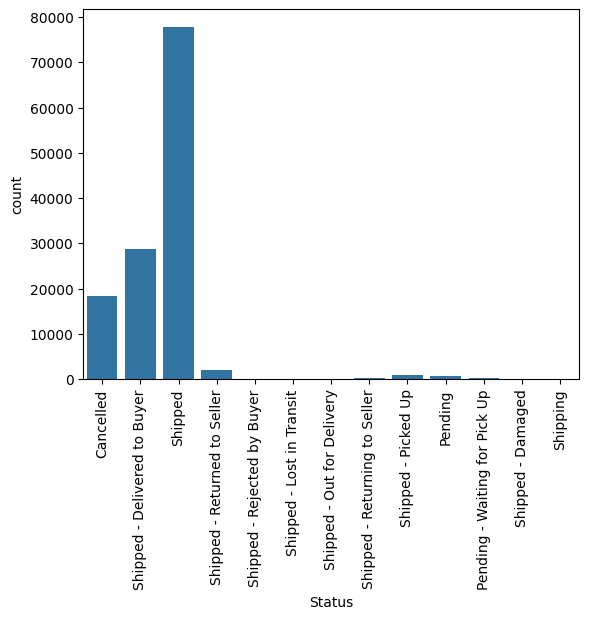

In [30]:
sns.countplot(data=df, x='Status')
plt.xticks(rotation=90)

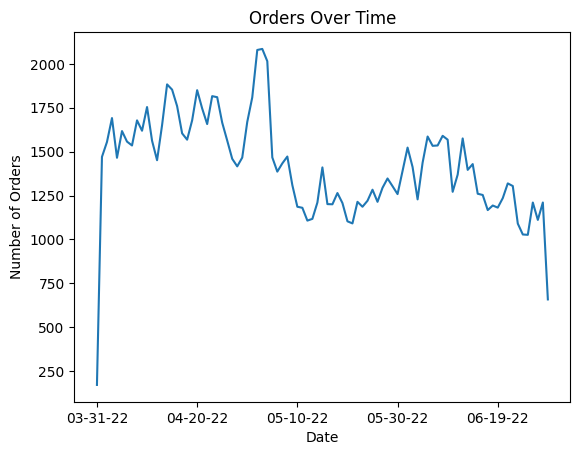

In [31]:
orders_per_day = df.groupby('Date').size()

plt.figure()
orders_per_day.plot()
plt.xlabel('Date')
plt.ylabel('Number of Orders')
plt.title('Orders Over Time')
plt.show()

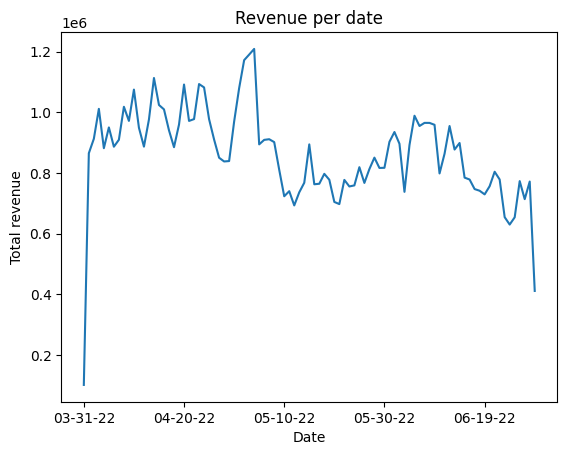

In [32]:
revenue_per_day = df.groupby('Date')['Amount'].sum()
plt.figure()
revenue_per_day.plot()
plt.title("Revenue per date")
plt.xlabel("Date")
plt.ylabel("Total revenue")
plt.show()

The daily order volume shows noticeable fluctuations over time, indicating non-uniform customer activity across the observed period. This suggests potential seasonality or promotional effects.

In [33]:
from scipy.stats import chi2_contingency

In [34]:
contingency_table = pd.crosstab(df['Category'], df['Status'])

chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-square statistic: {chi2:.2f}")
print(f"p-value: {p:.4f}")

Chi-square statistic: 1868.14
p-value: 0.0000


In [35]:
print(df['Unnamed: 22'].head())
print(df['Unnamed: 22'].isnull().mean())
print(df['Unnamed: 22'].nunique())

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: Unnamed: 22, dtype: object
0.38030626090327585
1


Unnamed 22 column should be dropped because it doesn't have any semantic meaning. The column fullfiled_by is more subtle and important. The typical values are 'Amazon' and 'Merchant'. Fullfiled_by encodes logistic strategy, delivery responivbility, and it often correlates with delivery speed, return rate, cancellation rate and customer satisfaction. 

In [36]:
df['fulfilled-by'].value_counts(normalize=True)

fulfilled-by
Easy Ship    1.0
Name: proportion, dtype: float64

In [37]:
pd.crosstab(df['fulfilled-by'], df['Status'], normalize='index')

Status        Cancelled   Pending  Pending - Waiting for Pick Up  \
fulfilled-by                                                       
Easy Ship      0.174682  0.006187                       0.007154   

Status        Shipped - Damaged  Shipped - Delivered to Buyer  \
fulfilled-by                                                    
Easy Ship              0.000025                      0.732464   

Status        Shipped - Lost in Transit  Shipped - Out for Delivery  \
fulfilled-by                                                          
Easy Ship                      0.000127                    0.000891   

Status        Shipped - Picked Up  Shipped - Rejected by Buyer  \
fulfilled-by                                                     
Easy Ship                0.024773                      0.00028   

Status        Shipped - Returned to Seller  Shipped - Returning to Seller  
fulfilled-by                                                               
Easy Ship                         0.049724                       0.003692

In [38]:
df['fulfilled-by'].unique()

array(['Easy Ship', nan], dtype=object)

Since this column has only one unique value, so even though theoretically this feature is useful, it is practically useless in this dataset. So I decided to drop it instead of imputing it.

I will drop the ship-city feature since it has 2 unique values and ship-postal-code because it is granular and high cardinality.  

In [39]:
df_ov = df_ov.drop(columns=['ship-city', 'ship-postal-code', 'ship-country', 'Unnamed: 22'])

In [40]:
df_ov.sample(2)

Date                        Status Fulfilment Sales Channel   \
107330  06-15-22                     Cancelled     Amazon      Amazon.in   
61955   05-21-22  Shipped - Delivered to Buyer   Merchant      Amazon.in   

       ship-service-level    Style            SKU       Category Size  \
107330          Expedited  JNE3506  JNE3506-KR-XS          kurta   XS   
61955            Standard  JNE3869   JNE3869-DR-M  Western Dress    M   

              ASIN Courier Status  Qty currency  Amount ship-state  \
107330  B08WPWK6BF      Cancelled    0      NaN     NaN  JHARKHAND   
61955   B09RK7Q644        Shipped    1      INR   721.0  KARNATAKA   

                                            promotion-ids    B2B fulfilled-by  
107330                                                NaN  False          NaN  
61955   Amazon PLCC Free-Financing Universal Merchant ...  False    Easy Ship

In [41]:
df_ov = df_ov.drop(columns=['fulfilled-by'])

Although the dataset contains 128,975 records, the asin attribute represents a product identifier with high cardinality (7,190 unique values) and no intrinsic predictive meaning. Therefore, it was excluded from the overview and modeling datasets.
SKU has extremely high cardinality and behaves similarly to an identifier. To avoid overfitting and sparsity, it is going to be excluded from the modeling dataset.

In [42]:
df_ov = df_ov.drop(columns=['ASIN', 'SKU'])

In [43]:
df_ov.sample()

Date   Status Fulfilment Sales Channel  ship-service-level  Style  \
57799  05-25-22  Shipped     Amazon      Amazon.in          Expedited  J0119   

      Category Size Courier Status  Qty currency  Amount   ship-state  \
57799      Top    M        Shipped    1      INR   574.0  MAHARASHTRA   

      promotion-ids    B2B  
57799           NaN  False

In [44]:
df_ov.to_csv("../data/processed/df_ov.csv", index=False)

In [45]:
df_check = pd.read_csv("../data/processed/df_ov.csv")
df_check.head()

Date                        Status Fulfilment Sales Channel   \
0  04-30-22                     Cancelled   Merchant      Amazon.in   
1  04-30-22  Shipped - Delivered to Buyer   Merchant      Amazon.in   
2  04-30-22                       Shipped     Amazon      Amazon.in   
3  04-30-22                     Cancelled   Merchant      Amazon.in   
4  04-30-22                       Shipped     Amazon      Amazon.in   

  ship-service-level    Style       Category Size Courier Status  Qty  \
0           Standard   SET389            Set    S            NaN    0   
1           Standard  JNE3781          kurta  3XL        Shipped    1   
2          Expedited  JNE3371          kurta   XL        Shipped    1   
3           Standard    J0341  Western Dress    L            NaN    0   
4          Expedited  JNE3671            Top  3XL        Shipped    1   

  currency  Amount   ship-state  \
0      INR  647.62  MAHARASHTRA   
1      INR  406.00    KARNATAKA   
2      INR  329.00  MAHARASHTRA   
3      INR  753.33   PUDUCHERRY   
4      INR  574.00   TAMIL NADU   

                                       promotion-ids    B2B  
0                                                NaN  False  
1  Amazon PLCC Free-Financing Universal Merchant ...  False  
2       IN Core Free Shipping 2015/04/08 23-48-5-108   True  
3                                                NaN  False  
4                                                NaN  False

In [46]:
def print_unique_values_for_each(df_ov):
    cols = ["Date", "Status", "Fulfilment", "Sales Channel ", "ship-service-level", "Style", "Category", "Size",
           "Courier Status", "Qty", "currency", "Amount", "ship-state", "promotion-ids", "B2B"]
    for col in cols:
        unique_vals = df_ov[col].unique()
        print(f"Column ****{col}****")
        print(f"Number of unique values: {len(unique_vals)}")
        print(unique_vals)
        print("-" * 60)

In [47]:
print_unique_values_for_each(df_ov)

Column ****Date****
Number of unique values: 91
['04-30-22' '04-29-22' '04-28-22' '04-27-22' '04-26-22' '04-25-22'
 '04-24-22' '04-23-22' '04-22-22' '04-21-22' '04-20-22' '04-19-22'
 '04-18-22' '04-17-22' '04-16-22' '04-15-22' '04-14-22' '04-13-22'
 '04-12-22' '04-11-22' '04-10-22' '04-09-22' '04-08-22' '04-07-22'
 '04-06-22' '04-05-22' '04-04-22' '04-03-22' '04-02-22' '04-01-22'
 '03-31-22' '05-31-22' '05-30-22' '05-29-22' '05-28-22' '05-27-22'
 '05-26-22' '05-25-22' '05-24-22' '05-23-22' '05-22-22' '05-21-22'
 '05-20-22' '05-19-22' '05-18-22' '05-17-22' '05-16-22' '05-15-22'
 '05-14-22' '05-13-22' '05-12-22' '05-11-22' '05-10-22' '05-09-22'
 '05-08-22' '05-07-22' '05-06-22' '05-05-22' '05-04-22' '05-03-22'
 '05-02-22' '05-01-22' '06-29-22' '06-28-22' '06-27-22' '06-26-22'
 '06-25-22' '06-24-22' '06-23-22' '06-22-22' '06-21-22' '06-20-22'
 '06-19-22' '06-18-22' '06-17-22' '06-16-22' '06-15-22' '06-14-22'
 '06-13-22' '06-12-22' '06-11-22' '06-10-22' '06-09-22' '06-08-22'
 '06-07-22' '0

In [48]:
df.groupby('Sales Channel ')['Amount'].mean()

Sales Channel 
Amazon.in     648.561465
Non-Amazon           NaN
Name: Amount, dtype: float64

In [53]:
df_ov

Date                        Status Fulfilment Sales Channel   \
0       04-30-22                     Cancelled   Merchant      Amazon.in   
1       04-30-22  Shipped - Delivered to Buyer   Merchant      Amazon.in   
2       04-30-22                       Shipped     Amazon      Amazon.in   
3       04-30-22                     Cancelled   Merchant      Amazon.in   
4       04-30-22                       Shipped     Amazon      Amazon.in   
...          ...                           ...        ...            ...   
128970  05-31-22                       Shipped     Amazon      Amazon.in   
128971  05-31-22                       Shipped     Amazon      Amazon.in   
128972  05-31-22                       Shipped     Amazon      Amazon.in   
128973  05-31-22                       Shipped     Amazon      Amazon.in   
128974  05-31-22                       Shipped     Amazon      Amazon.in   

       ship-service-level    Style       Category Size Courier Status  Qty  \
0                Standard   SET389            Set    S            NaN    0   
1                Standard  JNE3781          kurta  3XL        Shipped    1   
2               Expedited  JNE3371          kurta   XL        Shipped    1   
3                Standard    J0341  Western Dress    L            NaN    0   
4               Expedited  JNE3671            Top  3XL        Shipped    1   
...                   ...      ...            ...  ...            ...  ...   
128970          Expedited  JNE3697          kurta   XL        Shipped    1   
128971          Expedited   SET401            Set    M        Shipped    1   
128972          Expedited    J0157  Western Dress  XXL        Shipped    1   
128973          Expedited    J0012            Set   XS        Shipped    1   
128974          Expedited    J0003            Set    S        Shipped    1   

       currency   Amount    ship-state  \
0           INR   647.62   MAHARASHTRA   
1           INR   406.00     KARNATAKA   
2           INR   329.00   MAHARASHTRA   
3           INR   753.33    PUDUCHERRY   
4           INR   574.00    TAMIL NADU   
...         ...      ...           ...   
128970      INR   517.00     TELANGANA   
128971      INR   999.00       HARYANA   
128972      INR   690.00     TELANGANA   
128973      INR  1199.00       Gujarat   
128974      INR   696.00  CHHATTISGARH   

                                            promotion-ids    B2B  
0                                                     NaN  False  
1       Amazon PLCC Free-Financing Universal Merchant ...  False  
2            IN Core Free Shipping 2015/04/08 23-48-5-108   True  
3                                                     NaN  False  
4                                                     NaN  False  
...                                                   ...    ...  
128970                                                NaN  False  
128971       IN Core Free Shipping 2015/04/08 23-48-5-108  False  
128972                                                NaN  False  
128973       IN Core Free Shipping 2015/04/08 23-48-5-108  False  
128974       IN Core Free Shipping 2015/04/08 23-48-5-108  False  

[128975 rows x 15 columns]

The next step is preprocessing which I will do in the next notebook. An overview dataset (df_ov) was created by removing non-informative columns and saved for further preprocessing steps.